-***Read Data***-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# test_data_away_player_stats = pd.read_csv('X_Test_Data/test_away_player_statistics_df.csv')
# test_data_home_player_stats = pd.read_csv('X_Test_Data/test_home_player_statistics_df.csv')
# test_data_away_team_stats = pd.read_csv('X_Test_Data/test_away_team_statistics_df.csv')
# test_data_home_team_stats = pd.read_csv('X_Test_Data/test_home_team_statistics_df.csv')

train_home_team_stats_df = pd.read_csv('X_Train_Data/train_home_team_statistics_df.csv' ,index_col=0)
train_away_team_stats_df = pd.read_csv('X_Train_Data/train_away_team_statistics_df.csv' ,index_col=0)
train_home_player_stats_df = pd.read_csv('X_Train_Data/train_home_player_statistics_df.csv' ,index_col=0)
train_away_player_stats_df = pd.read_csv('X_Train_Data/train_away_player_statistics_df.csv' ,index_col=0)

train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col=0)

train_home = train_home_team_stats_df.iloc[:, 2:] # statistiques des joueurs de l'équipe hôte
train_away = train_away_team_stats_df.iloc[:, 2:] # statistiques des joueurs de l'équipe visiteuse

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

train_data = pd.concat([train_home, train_away], join='inner' ,axis=1) # Concat les stats des joueurs de l'équipe hôte et de l'équipe visiteuse
train_scores = train_scores.loc[train_data.index] # Réindexe les scores pour qu'ils correspondent à l'index de train_data

train_data = train_data.replace({np.inf: np.nan, -np.inf: np.nan}) # Remplace les valeurs infinies par NaN pour éviter les erreurs lors de la normalisation

In [2]:
train_home_team_stats_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


***-Clustering-***

,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,...,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match_std,TEAM_SUCCESSFUL_PASSES_5_last_match_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std,TEAM_SAVES_5_last_match_std,TEAM_CORNERS_5_last_match_std,TEAM_BALL_POSSESSION_5_last_match_std,TEAM_FOULS_5_last_match_std,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.201434,3.276772,2.161007,3.637661,2.267024,2.073027,5.622020,2.907996,5.794257,5.488060,4.226397,3.798358,3.101706,2.882929,7.223717,4.601363,2.624267,4.699540,1.946330,2.160455,4.519320,6.760776,2.132244,1.848087,2.782524,1.808256,3.319353,1.800078,1.726956,2.728284,5.364747,2.491623,1.958564,5.238626,5.085409,3.943932,3.529447,2.187905,2.679813,6.719373,3.350921,2.065355,4.723965,1.745625,1.983621,4.219004,6.509512,3.167431,2.881807,3.258959,...,2.768686,3.914180,5.736148,2.676471,2.386771,3.278954,2.443769,3.518174,2.055559,1.994620,3.154805,4.856933,3.057628,2.492644,4.894377


Teams by Cluster:


,TEAM_NAME,Cluster
0,ADO Den Haag,0
1,AFC Bournemouth,0
2,AFC Wimbledon,0
4,AS Eupen,0
346,Yeovil Town,0
...,...,...
8,Ajaccio,2
7,Accrington Stanley,2
6,AaB,2
349,Zulte-Waregem,2


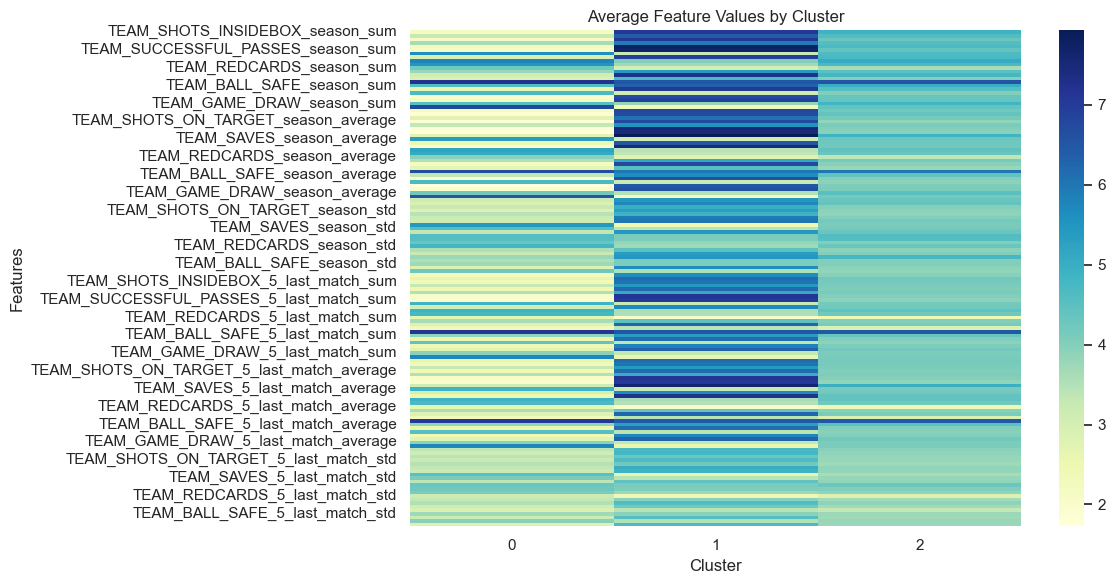

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Load data
train_home_team_stats_df = pd.read_csv('X_Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_stats_df = pd.read_csv('X_Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col=0)

# Prepare data
home_team = train_home_team_stats_df[['TEAM_NAME'] + list(train_home_team_stats_df.columns[3:])].copy()
home_team['HOME_OR_AWAY'] = 'HOME'
away_team = train_away_team_stats_df[['TEAM_NAME'] + list(train_away_team_stats_df.columns[3:])].copy()
away_team['HOME_OR_AWAY'] = 'AWAY'

all_teams = pd.concat([home_team, away_team], axis=0)

numeric_columns = all_teams.select_dtypes(include=[np.number]).columns
all_teams_numeric = all_teams[['TEAM_NAME'] + list(numeric_columns)]

team_stats = all_teams_numeric.groupby('TEAM_NAME').mean()
team_stats.fillna(team_stats.mean(), inplace=True)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(team_stats)

# Add cluster labels
team_stats['Cluster'] = clusters

# Summary statistics by cluster
cluster_summary = team_stats.groupby('Cluster').mean()
display(cluster_summary)

# Teams by cluster
teams_by_cluster = team_stats.reset_index()[['TEAM_NAME', 'Cluster']].sort_values('Cluster')
print("\nTeams by Cluster:")
display(teams_by_cluster)

# Heatmap of cluster centers
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.drop(columns=['Cluster'], errors='ignore').T, cmap="YlGnBu", annot=False)
plt.title("Average Feature Values by Cluster")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


# Analyse de regroupement des équipes avec KMeans

Dans cette section, nous appliquons un algorithme de clustering non supervisé, KMeans afin de regrouper les équipes en fonction de leurs statistiques moyennes de performance.

Étapes :

1. Standardisation des données :
   Les données statistiques des équipes sont normalisées pour garantir que toutes les variables contribuent de manière équitable à l’algorithme de clustering.

2. Application de KMeans :
   L'algorithme KMeans est utilisé avec 3 clusters. Il attribue à chaque équipe un label basé sur la similarité de ses statistiques.

3. Ajout des étiquettes de cluster :
   Chaque équipe reçoit un label de cluster (0, 1 ou 2), qui est ensuite ajouté à la table des statistiques.

4. Résumé des clusters :
   Nous calculons les des statistiques pour chaque cluster afin de mieux comprendre les caractéristiques typiques des groupes d’équipes formés.

5. Visualisation avec une carte thermique :
   Une map est générée pour visualiser les moyennes des variables statistiques par cluster

Cette approche permet de segmenter les équipes selon leur profil de jeu ou de performance sans utiliser de données de score ou de résultats.


-***Train***-
Try the metod Random Forest for classification and realization of the confusion matrix

Classification Report:

              precision    recall  f1-score   support

   AWAY_WINS       0.47      0.41      0.44       758
        DRAW       0.31      0.06      0.10       620
   HOME_WINS       0.50      0.78      0.61      1083

    accuracy                           0.48      2461
   macro avg       0.43      0.42      0.38      2461
weighted avg       0.44      0.48      0.43      2461



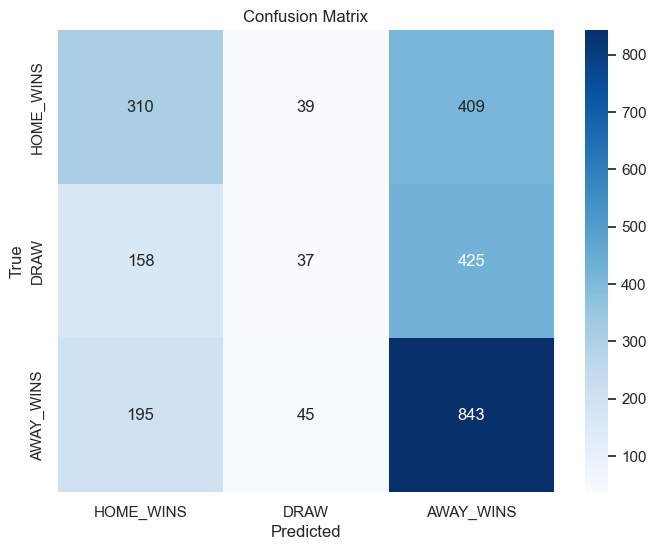

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Set display options
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Extract all columns except the first two (index and team name)
train_home = train_home_team_stats_df.iloc[:, 2:]
train_away = train_away_team_stats_df.iloc[:, 2:]

# Prefix the columns with 'HOME_' and 'AWAY_'
train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

# Concatenate the home and away dataframes along the columns
train_data = pd.concat([train_home, train_away], axis=1)

# Replace infinite values with NaN and fill NaN values with the mean of each column
train_data = train_data.replace({np.inf: np.nan, -np.inf: np.nan})
train_data.fillna(train_data.mean(), inplace=True)

# Define the target variable as the team with the highest score
y = train_scores.idxmax(axis=1)  # 'HOME_WINS', 'DRAW', 'AWAY_WINS'

X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42)

#Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

#Make predictions on the validation set
y_pred = model.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['HOME_WINS', 'DRAW', 'AWAY_WINS'], yticklabels=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Préparation des données :
Nous commençons par sélectionner les caractéristiques statistiques des équipes à domicile et à l’extérieur. Ces caractéristiques sont extraites des dataframes, en excluant les identifiants comme l’ID du match ou les noms des équipes.
Pour éviter toute confusion entre des statistiques similaires (comme les buts marqués ou la possession pour les deux équipes), nous ajoutons un préfixe à chaque colonne : "HOME_" pour les statistiques de l’équipe à domicile et "AWAY_" pour celles de l’équipe à l’extérieur. Nous concaténons ensuite ces données dans un seul ensemble où chaque ligne représente un match avec les statistiques des deux équipes.
Les valeurs manquantes ou infinies sont remplacées par la moyenne de chaque colonne. Cela garantit que les données sont propres et prêtes à être utilisées pour l'entraînement.

Variable cible :
La variable cible est le résultat du match. Il existe un DataFrame appelé train_scores avec trois colonnes : 'HOME_WINS', 'DRAW' et 'AWAY_WINS'. Chaque ligne contient un score ou un indicateur pour chaque résultat possible. En utilisant idxmax, nous sélectionnons la colonne ayant la valeur la plus élevée comme étiquette pour ce match.

Séparation entraînement/test

Entraînement du classificateur Random Forest :
Nous utilisons un classificateur Random Forest, une méthode d’apprentissage par ensemble populaire. Random Forest fonctionne en entraînant de nombreux arbres de décision sur différentes parties des données, puis en moyennant leurs prédictions. Cela réduit le surapprentissage et améliore la généralisation.
Chaque arbre de décision est entraîné sur un sous-ensemble aléatoire des données d’entraînement (avec remise), et sur un sous-ensemble aléatoire des caractéristiques. Lors d’une prédiction, chaque arbre effectue un "vote", et la prédiction finale correspond à la majorité des votes de tous les arbres.

Évaluation du modèle :
Après l’entraînement, nous utilisons l’ensemble de validation pour faire des prédictions. Nous évaluons le modèle à l’aide d’un rapport de classification, qui indique la précision, le rappel et le score F1 pour chaque classe.
Nous traçons également une matrice de confusion pour visualiser la fréquence à laquelle le modèle prédit correctement chaque résultat et où il se trompe. Cela permet de mieux comprendre les forces et faiblesses du modèle.

-***Submission***-

Loading data...
Preparing team data...
Scaling features...
Determining optimal clusters using Elbow Method...
For k=1, inertia is 49000.00
For k=2, inertia is 37839.27
For k=3, inertia is 34659.22
For k=4, inertia is 33810.97
For k=5, inertia is 32446.16
For k=6, inertia is 31996.94
For k=7, inertia is 31273.91
For k=8, inertia is 30477.83
For k=9, inertia is 30344.87


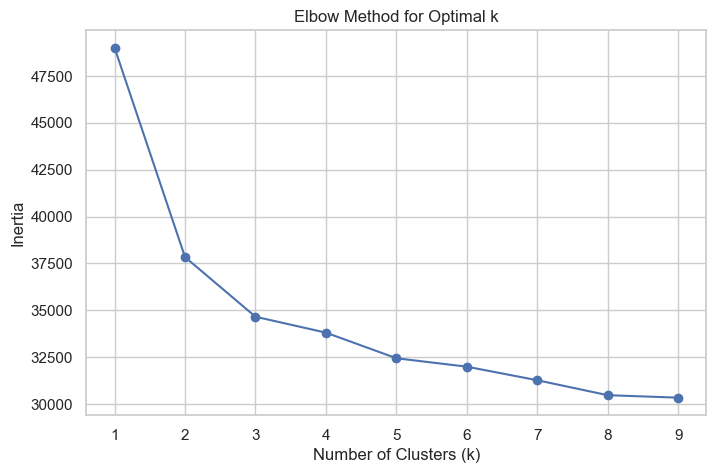


Chosen number of clusters (based on elbow): 3
Creating pairplot visualization...


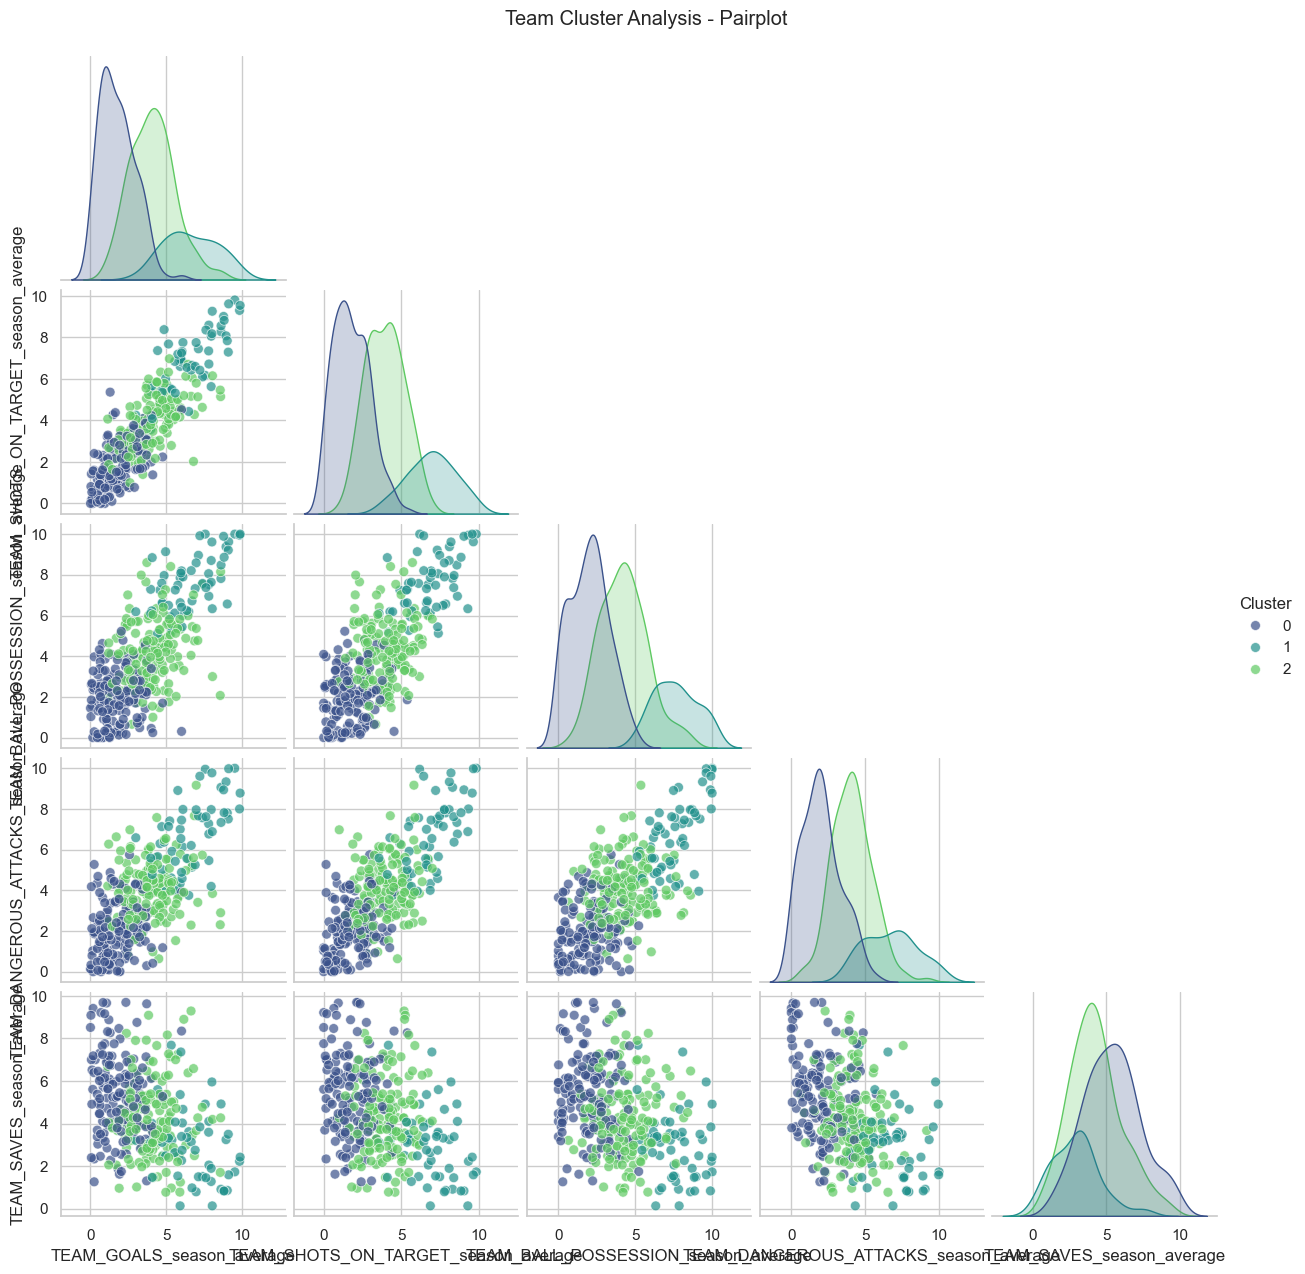

Creating boxplot visualization...


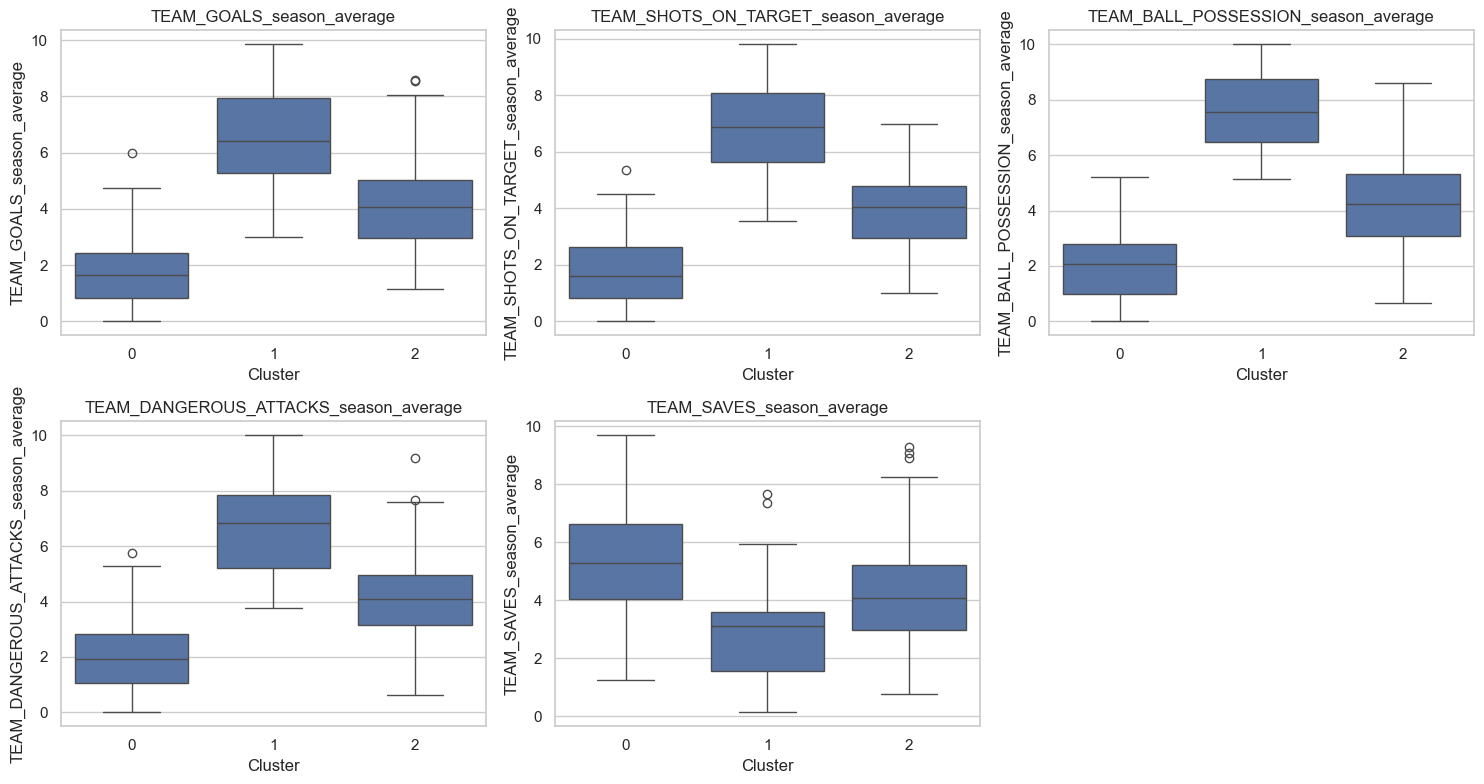

Preparing match data with cluster features...

Process completed successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

print("Loading data...")
train_home_team = pd.read_csv('X_Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team = pd.read_csv('X_Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col=0)

def prepare_team_data(home_df, away_df):
    print("Preparing team data...")
    home_teams = home_df.copy()
    away_teams = away_df.copy()
    
    home_teams['HOME_AWAY'] = 'HOME'
    away_teams['HOME_AWAY'] = 'AWAY'
    
    home_teams.columns = [col.replace('HOME_', '') if 'HOME_' in col else col for col in home_teams.columns]
    away_teams.columns = [col.replace('AWAY_', '') if 'AWAY_' in col else col for col in away_teams.columns]
    
    all_teams = pd.concat([home_teams, away_teams])
    
    numeric_cols = all_teams.select_dtypes(include=[np.number]).columns.tolist()
    
    team_stats = all_teams.groupby('TEAM_NAME')[numeric_cols].mean()
    
    return team_stats

team_stats = prepare_team_data(train_home_team, train_away_team) 

team_stats = team_stats.fillna(team_stats.median())

print("Scaling features...")
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats)

print("Determining optimal clusters using Elbow Method...")
inertias = []
possible_k_values = range(1, 10)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(team_stats_scaled)
    inertias.append(kmeans.inertia_)
    print(f"For k={k}, inertia is {kmeans.inertia_:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(possible_k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

optimal_k = 3  
print(f"\nChosen number of clusters (based on elbow): {optimal_k}")


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(team_stats_scaled)

team_stats = pd.concat([
    team_stats,
    pd.Series(cluster_labels, index=team_stats.index, name='Cluster')
], axis=1)

print("Creating pairplot visualization...")
pairplot_metrics = [
    'TEAM_GOALS_season_average',
    'TEAM_SHOTS_ON_TARGET_season_average',
    'TEAM_BALL_POSSESSION_season_average',
    'TEAM_DANGEROUS_ATTACKS_season_average',
    'TEAM_SAVES_season_average'
]

viz_data = team_stats[pairplot_metrics + ['Cluster']].reset_index()
viz_data['Cluster'] = viz_data['Cluster'].astype('category')

sns.pairplot(
    data=viz_data,
    vars=pairplot_metrics,
    hue='Cluster',
    palette='viridis',
    plot_kws={'alpha': 0.7, 's': 50},
    diag_kind='kde',
    corner=True
)
plt.suptitle('Team Cluster Analysis - Pairplot', y=1.02)
plt.show()

print("Creating boxplot visualization...")
key_metrics = [
    'TEAM_GOALS_season_average',
    'TEAM_SHOTS_ON_TARGET_season_average',
    'TEAM_BALL_POSSESSION_season_average',
    'TEAM_DANGEROUS_ATTACKS_season_average',
    'TEAM_SAVES_season_average'
]

plt.figure(figsize=(15, 8))
for i, metric in enumerate(key_metrics):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster', y=metric, data=team_stats.reset_index())
    plt.title(metric)
plt.tight_layout()
plt.show()

print("Preparing match data with cluster features...")
cluster_map = team_stats['Cluster'].to_dict()

def create_match_features(home_df, away_df, cluster_map):
    home_numeric = home_df.select_dtypes(include=[np.number])
    away_numeric = away_df.select_dtypes(include=[np.number])
    
    home_features = home_numeric.add_prefix('HOME_')
    away_features = away_numeric.add_prefix('AWAY_')
    
    home_features['HOME_CLUSTER'] = home_df['TEAM_NAME'].map(cluster_map)
    away_features['AWAY_CLUSTER'] = away_df['TEAM_NAME'].map(cluster_map)
    
    home_features['CLUSTER_DIFF'] = home_features['HOME_CLUSTER'] - away_features['AWAY_CLUSTER']
    home_features['SAME_CLUSTER'] = (home_features['HOME_CLUSTER'] == away_features['AWAY_CLUSTER']).astype(int)
    
    combined = pd.concat([home_features, away_features], axis=1)
    
    combined = combined.fillna(combined.median())
    
    return combined

train_data = create_match_features(train_home_team, train_away_team, cluster_map)

print("\nProcess completed successfully!")

Loading data...
[0]	validation_0-mlogloss:1.09278
[1]	validation_0-mlogloss:1.08786
[2]	validation_0-mlogloss:1.08280
[3]	validation_0-mlogloss:1.07795
[4]	validation_0-mlogloss:1.07400
[5]	validation_0-mlogloss:1.07035
[6]	validation_0-mlogloss:1.06699
[7]	validation_0-mlogloss:1.06387
[8]	validation_0-mlogloss:1.06094
[9]	validation_0-mlogloss:1.05814
[10]	validation_0-mlogloss:1.05534
[11]	validation_0-mlogloss:1.05294
[12]	validation_0-mlogloss:1.05059
[13]	validation_0-mlogloss:1.04856
[14]	validation_0-mlogloss:1.04670
[15]	validation_0-mlogloss:1.04499
[16]	validation_0-mlogloss:1.04344
[17]	validation_0-mlogloss:1.04194
[18]	validation_0-mlogloss:1.04060
[19]	validation_0-mlogloss:1.03884
[20]	validation_0-mlogloss:1.03780
[21]	validation_0-mlogloss:1.03687
[22]	validation_0-mlogloss:1.03582
[23]	validation_0-mlogloss:1.03484
[24]	validation_0-mlogloss:1.03374
[25]	validation_0-mlogloss:1.03284
[26]	validation_0-mlogloss:1.03201
[27]	validation_0-mlogloss:1.03116
[28]	validatio

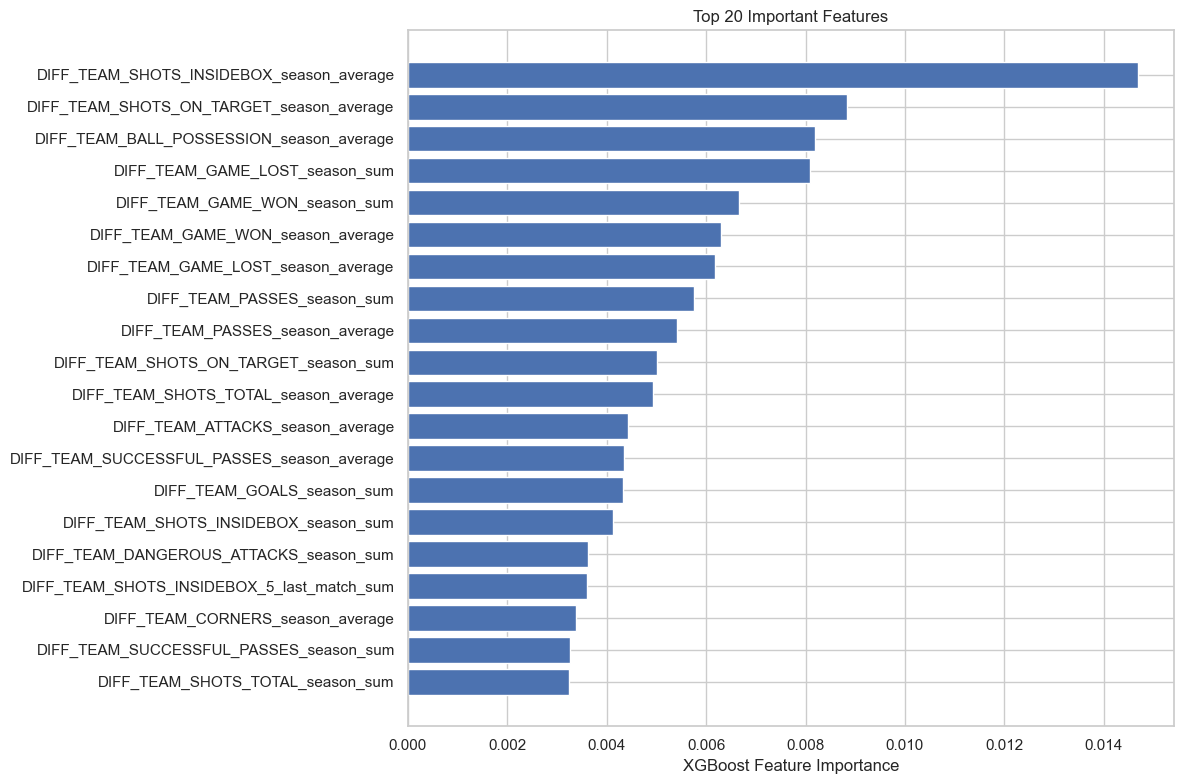

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print("Loading data...")
train_home = pd.read_csv('X_Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away = pd.read_csv('X_Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col=0)

y = train_scores.idxmax(axis=1) 

def create_features(home_df, away_df):
    home_features = home_df.iloc[:, 2:].add_prefix('HOME_').copy()
    away_features = away_df.iloc[:, 2:].add_prefix('AWAY_').copy()
    
    common_cols = set(home_df.columns[2:]).intersection(away_df.columns[2:])
    diff_features = pd.DataFrame({
        f'DIFF_{col}': home_df[col] - away_df[col] 
        for col in common_cols
    })
    
    return pd.concat([
        home_features,
        away_features,
        diff_features
    ], axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)

X = create_features(train_home, train_away)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=20
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(figsize=(12, 8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(
    X.columns[sorted_idx][-20:],
    model.feature_importances_[sorted_idx][-20:]
)
plt.xlabel("XGBoost Feature Importance")
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()